## Analisis resultado de union ramas Meteo, contaminacion y trafico para los datos de Madrid ciudad 2018 y 2019 (jaume)


In [1]:
#imports librerias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Cargamos Meteo

In [2]:
#cargamos dataframe meteo madrid y ponemos campo fecha como indice
df_estacion_datos_diarios = pd.read_csv('../AreaMeteo/df_sinhoras_estacion_datos_diarios_mad.csv')
df_estacion_datos_diarios['fecha'] = pd.to_datetime(df_estacion_datos_diarios['fecha'], format='%Y-%m-%d')
df_estacion_datos_diarios=df_estacion_datos_diarios.set_index('fecha')

#df_estacion_datos_diarios['fecha']=pd.to_datetime(df_estacion_datos_diarios["fecha"], format='%Y-%m-%d', errors='coerce')
#df_estacion_datos_diarios['fecha'] = pd.DatetimeIndex(df_estacion_datos_diarios['fecha']).date

In [3]:
print(df_estacion_datos_diarios.columns)
df_estacion_datos_diarios.head

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            indicativo                        nombre provincia  altitud  tmed  \
fecha                                                                          
2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   6.2   
2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   9.4   
2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  10.9   
2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  11.3   
2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   8.2   
...               ...                           ...       ...      ...   ...   
2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.6   
2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.2   
2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   6.9   
2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   5.7   
2019-12-31

In [4]:
#queremos 1 medina para la ciudad de madrid. hacemos drop las columnas que identifican el nombre de la estacion o relativas a la fecha. Nos quedamos solo con los valores
df_Meteo_Mad=df_estacion_datos_diarios.drop(columns=['altitud','provincia','indicativo','nombre', 'month', 'week' ,'year' ,'season','season_name'])
print(df_Meteo_Mad)

            tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.2   0.0   1.5   1.5  26.0      5.30  11.90  5.9   952.20   
2018-01-02   9.4   0.0   5.5   5.5  29.0      4.20  11.90  7.0   952.20   
2018-01-03  10.9   0.0   7.2   7.2  26.0      5.30  10.30  4.6   952.90   
2018-01-04  11.3   0.0   8.3   8.3  25.0      4.70  10.30  5.8   949.80   
2018-01-05   8.2  13.6   5.1   5.1  22.0      5.30  12.50  1.6   941.00   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   7.6   0.0  -0.4  -0.4   5.0      0.80   6.10  8.4   951.45   
2019-12-28   7.2   0.0  -2.3  -2.3  21.0      0.60   4.15  9.0   950.75   
2019-12-29   6.9   0.0  -1.9  -1.9  67.0      0.80   3.75  9.0   952.25   
2019-12-30   5.7   0.0  -2.0  -2.0  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.0   0.0  -1.5  -1.5  21.0      0.55   3.10  8.7   953.10   

            presmin  
fe

In [5]:
df_Meteo_Mad= df_Meteo_Mad.resample('D').median()
df_Meteo_Mad.head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   952.25   
2019-12-30   7.0   0.0   1.5   1.5  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.8   0.0   1.5   1.5  21.0      0.55   3.10  8.7   953.1

## Cargamos datos de contaminación 

In [6]:
#cargamos datos de contaminacion de madrid  
dfContaminacion2018_2019= pd.read_csv('../datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019.csv' , sep=';', delimiter=None, header='infer', names=None, index_col=None,)
dfContaminacion2018_2019['date'] = pd.to_datetime(dfContaminacion2018_2019['date'], format='%Y-%m-%d')
dfContaminacion2018_2019=dfContaminacion2018_2019.set_index('date')
dfContaminacion2018_2019=dfContaminacion2018_2019.drop(columns=['year','date.1'])
dfContaminacion2018_2019.index.rename('fecha', inplace=True)
dfContaminacion2018_2019.head

<bound method NDFrame.head of             pm10
fecha           
2018-10-01  25.0
2018-10-02  32.0
2018-10-03  35.0
2018-10-04  39.0
2018-10-05  39.0
...          ...
2019-03-28  25.0
2019-03-29  29.0
2019-03-30  27.0
2019-03-31  14.0
2019-12-31  44.0

[646 rows x 1 columns]>

## Cargamos datos de trafico

In [7]:
#cargamos datos de trafico de madrid 
dftrafico2018_2019= pd.read_csv('../Tráfico/Madrid/trafico_mad.csv' , sep=',', delimiter=None, header='infer', names=None, index_col=None,)
dftrafico2018_2019['fecha'] = pd.to_datetime(dftrafico2018_2019['fecha'], format='%Y-%m-%d')
dftrafico2018_2019=dftrafico2018_2019.set_index('fecha')
dftrafico2018_2019.index.rename('fecha', inplace=True)
dftrafico2018_2019.head

<bound method NDFrame.head of             intensidad  ocupacion  carga
fecha                                   
2018-01-01       128.0        1.0    9.0
2018-01-02       177.0        3.0   15.0
2018-01-03       189.0        3.0   16.0
2018-01-04       198.0        3.0   16.0
2018-01-05       201.0        3.0   16.0
...                ...        ...    ...
2019-12-27       188.0        3.0   15.0
2019-12-28       148.0        2.0   11.0
2019-12-29       131.0        2.0    9.0
2019-12-30       180.0        3.0   14.0
2019-12-31       142.0        2.0   11.0

[730 rows x 3 columns]>

In [8]:
# mergeamos ambos dataframes. meteo , contaminacion y trafico

df_mad = pd.merge(df_Meteo_Mad,dfContaminacion2018_2019,left_index=True, right_index=True)
df_mad = pd.merge(df_mad,dftrafico2018_2019,left_index=True, right_index=True)
df_mad .head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-26  10.3   0.0   5.0   5.0   2.5      1.40   6.10  7.9   950.40   
2019-12-27   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   952.25   
2019-12-31   6.8   0.0   1.5   1.5  21.0      0.55   3.10  8.7   953.1

In [9]:
df_mad.describe()

tmed        prec        tmin        tmax         dir    velmedia  \
count  646.000000  646.000000  646.000000  646.000000  646.000000  646.000000   
mean    15.629799    1.151084   10.077709   10.077709   19.671827    2.183282   
std      8.101386    3.924190    7.191732    7.191732   13.059549    1.184725   
min      1.500000    0.000000   -3.400000   -3.400000    1.000000    0.300000   
25%      8.400000    0.000000    3.900000    3.900000    9.000000    1.400000   
50%     13.800000    0.000000    8.700000    8.700000   23.000000    1.900000   
75%     23.075000    0.000000   16.587500   16.587500   25.000000    2.800000   
max     32.900000   36.200000   25.100000   25.100000   99.000000    7.250000   

            racha         sol     presmax     presmin        pm10  intensidad  \
count  646.000000  646.000000  646.000000  646.000000  643.000000  646.000000   
mean     9.473684    8.358359  941.368731  936.743111   24.127527  183.818885   
std      3.518926    3.904235    6.156612    7.112969   12.238641   35.989228   
min      3.100000    0.000000  919.200000  905.000000    5.000000   90.000000   
25%      6.950000    6.125000  938.250000  933.425000   15.000000  150.250000   
50%      9.200000    9.300000  941.300000  937.125000   22.000000  198.000000   
75%     11.625000   11.000000  945.337500  940.775000   31.000000  212.000000   
max     25.800000   13.500000  956.700000  952.500000   73.000000  247.000000   

        ocupacion       carga  
count  646.000000  646.000000  
mean     3.043344   14.972136  
std      1.086054    3.613819  
min      1.000000    6.000000  
25%      2.000000   11.000000  
50%      3.000000   16.500000  
75%      4.000000   18.000000  
max      6.000000   21.000000

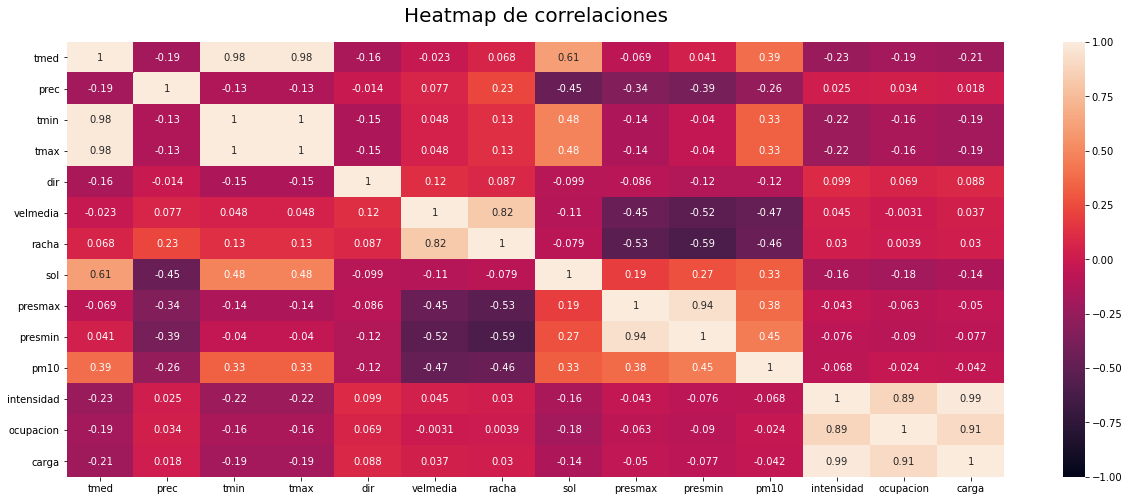

In [10]:
# Increase the size of the heatmap.
plt.figure(figsize=(21, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_mad.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);

### Vemos cierta correlacion positiva de particulas pm10 con las presiones maximas y minamas asi como las temperaturas. 
### el pm10 , asi como las presiones atmosfericas tambien tiene correlacion negativa con los campos de viento (velmedia y racha)
### vemos que hay correlaciones muy bajas de pm10 con la intensidad, ocupacion o carga de trafico.
### vemos que las variables de trafico estan muy correlacionadas entre ellas asi como algunas de meteo. (Presmax con pres min, racha con vel media , incluso sol con tmed guardan cierta correlacion.
### consideramos aplicar algoritmos de reduccion de variables

In [11]:
#añadiremos campos derivados del campo fecha para poder visualizar medidas por estacion del año y dia de la semana.

df_mad['season'] = (df_mad.index.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df_mad['season_name'] = df_mad['season'].map(seasons)


df_mad['year'] = df_mad.index.year
df_mad['month'] = df_mad.index.month
df_mad['week'] = df_mad.index.isocalendar().week
df_mad['weekday'] = df_mad.index.weekday
df_mad['weekday-type'] = np.where(df_mad['weekday']>=5,'weekend','working day')
#transformo month y year a string para sacar el month-year
df_mad['month']= df_mad['month'].astype(str)
df_mad['year']= df_mad['year'].astype(str)
df_mad['month-year'] = df_mad[['month', 'year']].agg('-'.join, axis=1)

df_mad.head(7)

tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0       3.1   10.0  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0       2.8   11.9  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0       1.7    8.6  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0       2.2    7.8  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0       3.1   11.7  1.6   942.35   
2018-01-06   3.3  21.1   1.4   1.4   4.0       1.7    8.6  0.0   925.00   
2018-01-07   2.2   3.3   0.9   0.9  12.0       2.8    7.5  0.0   928.40   

            presmin  ...  ocupacion  carga  season  season_name  year month  \
fecha                ...                                                      
2018-01-01   950.00  ...        1.0    9.0       1       Winter  2018     1   
2018-01-02   950.90  ...        3.0   15.0       1       Winter  2018     1   
2018-01-03   951.05  ...        3.0   16.0       1       Winter  2018     1   
2018-01-04   942.35  ...        3.0   16.0       1       Winter  2018     1   
2018-01-05   925.00  ...        3.0   16.0       1       Winter  2018     1   
2018-01-06   918.60  ...        2.0   10.0       1       Winter  2018     1   
2018-01-07   918.45  ...        2.0   10.0       1       Winter  2018     1   

           week weekday  weekday-type  month-year  
fecha                                              
2018-01-01    1       0   working day      1-2018  
2018-01-02    1       1   working day      1-2018  
2018-01-03    1       2   working day      1-2018  
2018-01-04    1       3   working day      1-2018  
2018-01-05    1       4   working day      1-2018  
2018-01-06    1       5       weekend      1-2018  
2018-01-07    1       6       weekend      1-2018  

[7 rows x 22 columns]

In [12]:
# Ahora que tenemos las estaciones vamos a ver las correlaciones y otros datos por estaciones del año.
# Creamos subframes por nombre de estacion
Winter=['Winter']
Spring=['Spring']
Summer=['Summer']
Autumn=['Autumn']
df_mad_subframe=df_mad[['tmed','prec','tmin','dir','velmedia','racha','sol','presmax','presmin','pm10','ocupacion','intensidad','carga','season_name']]
df_mad_Winter = df_mad_subframe[df_mad_subframe['season_name'].isin(Winter)]
df_mad_Spring = df_mad_subframe[df_mad_subframe['season_name'].isin(Spring)]
df_mad_Summer = df_mad_subframe[df_mad_subframe['season_name'].isin(Summer)]
df_mad_Autumn = df_mad_subframe[df_mad_subframe['season_name'].isin(Autumn)]

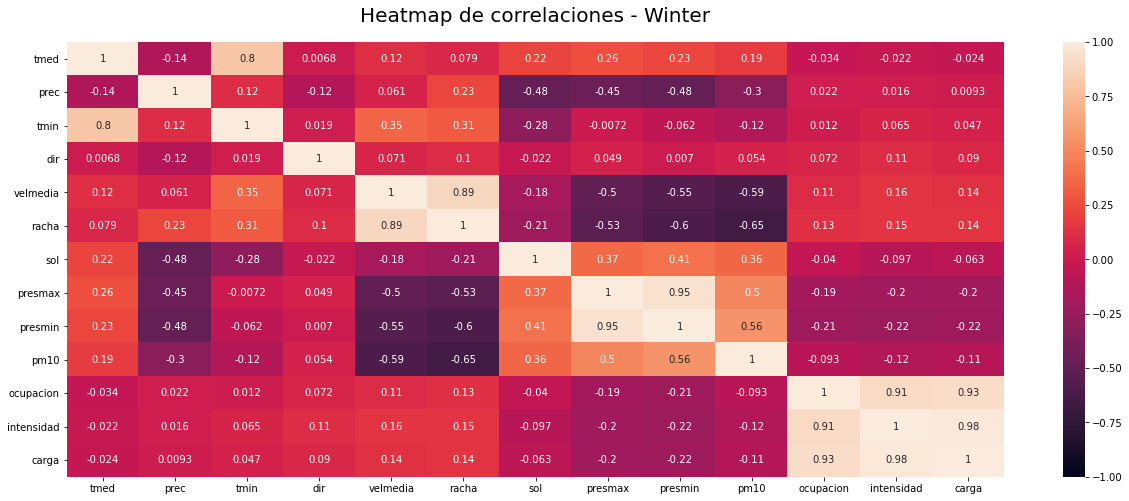

In [13]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Winter.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Winter', fontdict={'fontsize':20}, pad=20);

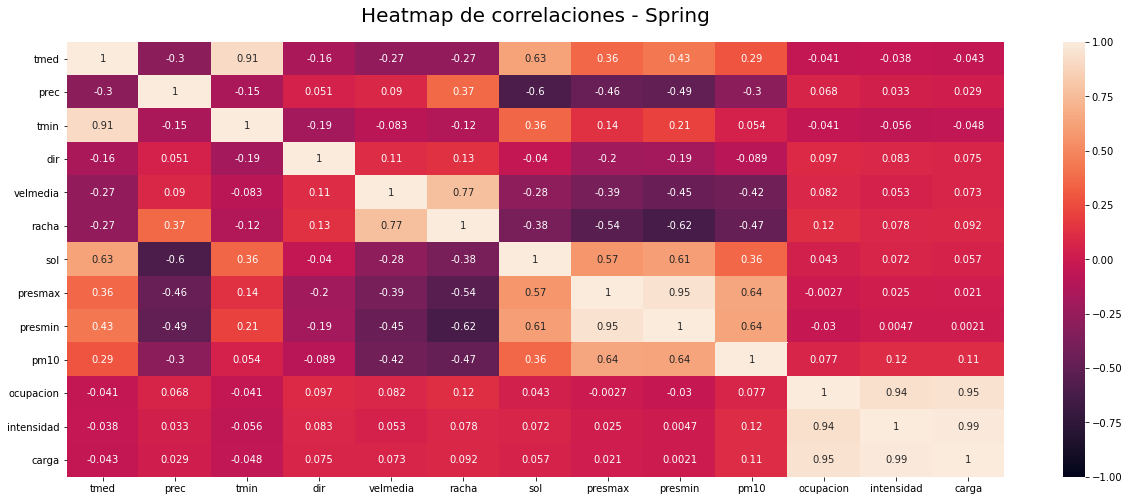

In [14]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Spring.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Spring', fontdict={'fontsize':20}, pad=20);

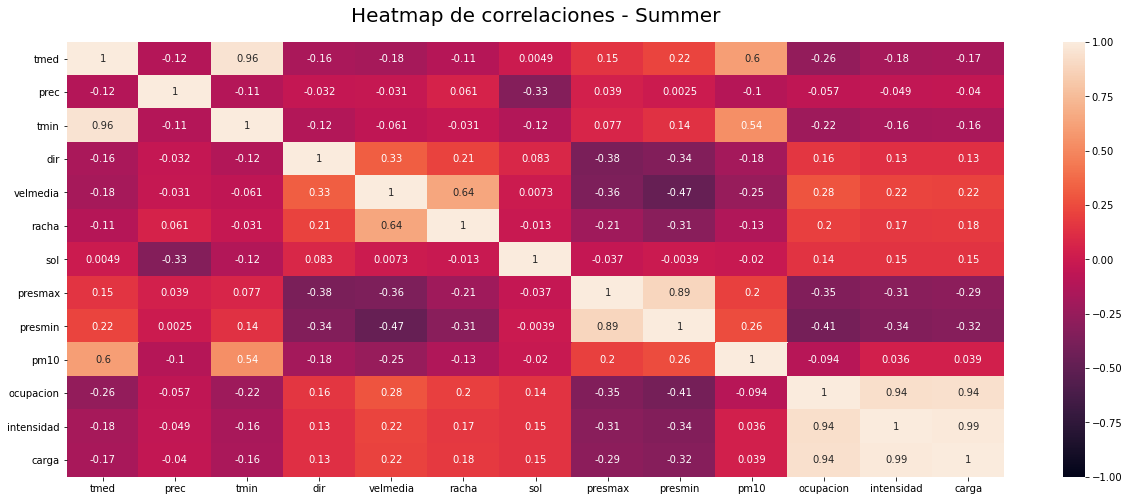

In [15]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Summer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Summer', fontdict={'fontsize':20}, pad=20);

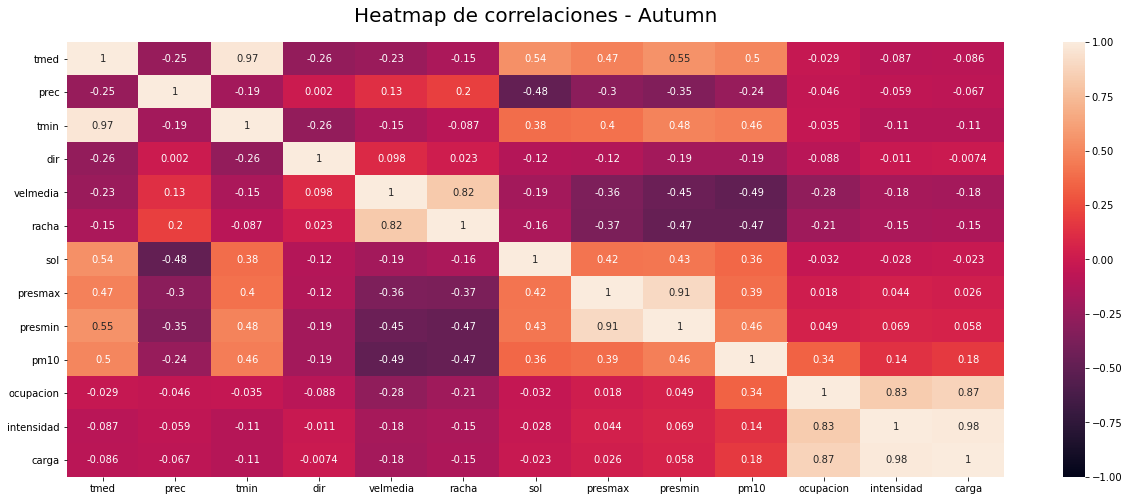

In [16]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Autumn.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Autumn', fontdict={'fontsize':20}, pad=20);

### interesante ver las correlaciones del pm10 vs presiones max y pres min por cada estacion de año
      WT. 0,5 / 0,56
      SP. 0,64 / 0,64
      SM. 0,2 / 0,2
      AT. 0,39 / 0,46
      
### interesante ver las correlaciones del pm10 vs temperatura media y minima por cada estacion de año
      WT. 0,19 / -0,12
      SP. 0,29 / 0,054
      SM. 0,6 / 0,54
      AT. 0,5 / 0,46
      
### interesante ver las correlaciones del pres max vs temperatura media por cada estacion de año. 2 años de datos son "pocas" estaciones?
      WT. 0,26 
      SP. 0,36
      SM. 0,15
      AT. 0,47   

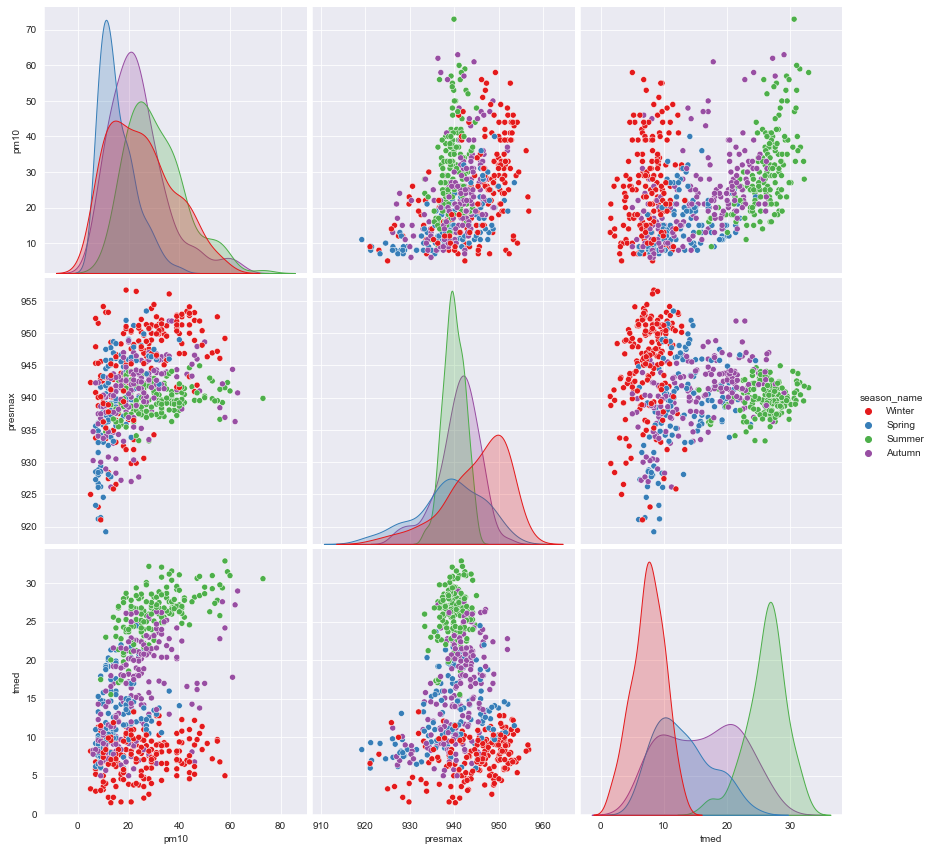

In [17]:
##visualizaremos vs estaciones del año pm10, presmax y tmed
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','presmax','tmed','season_name']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=4)

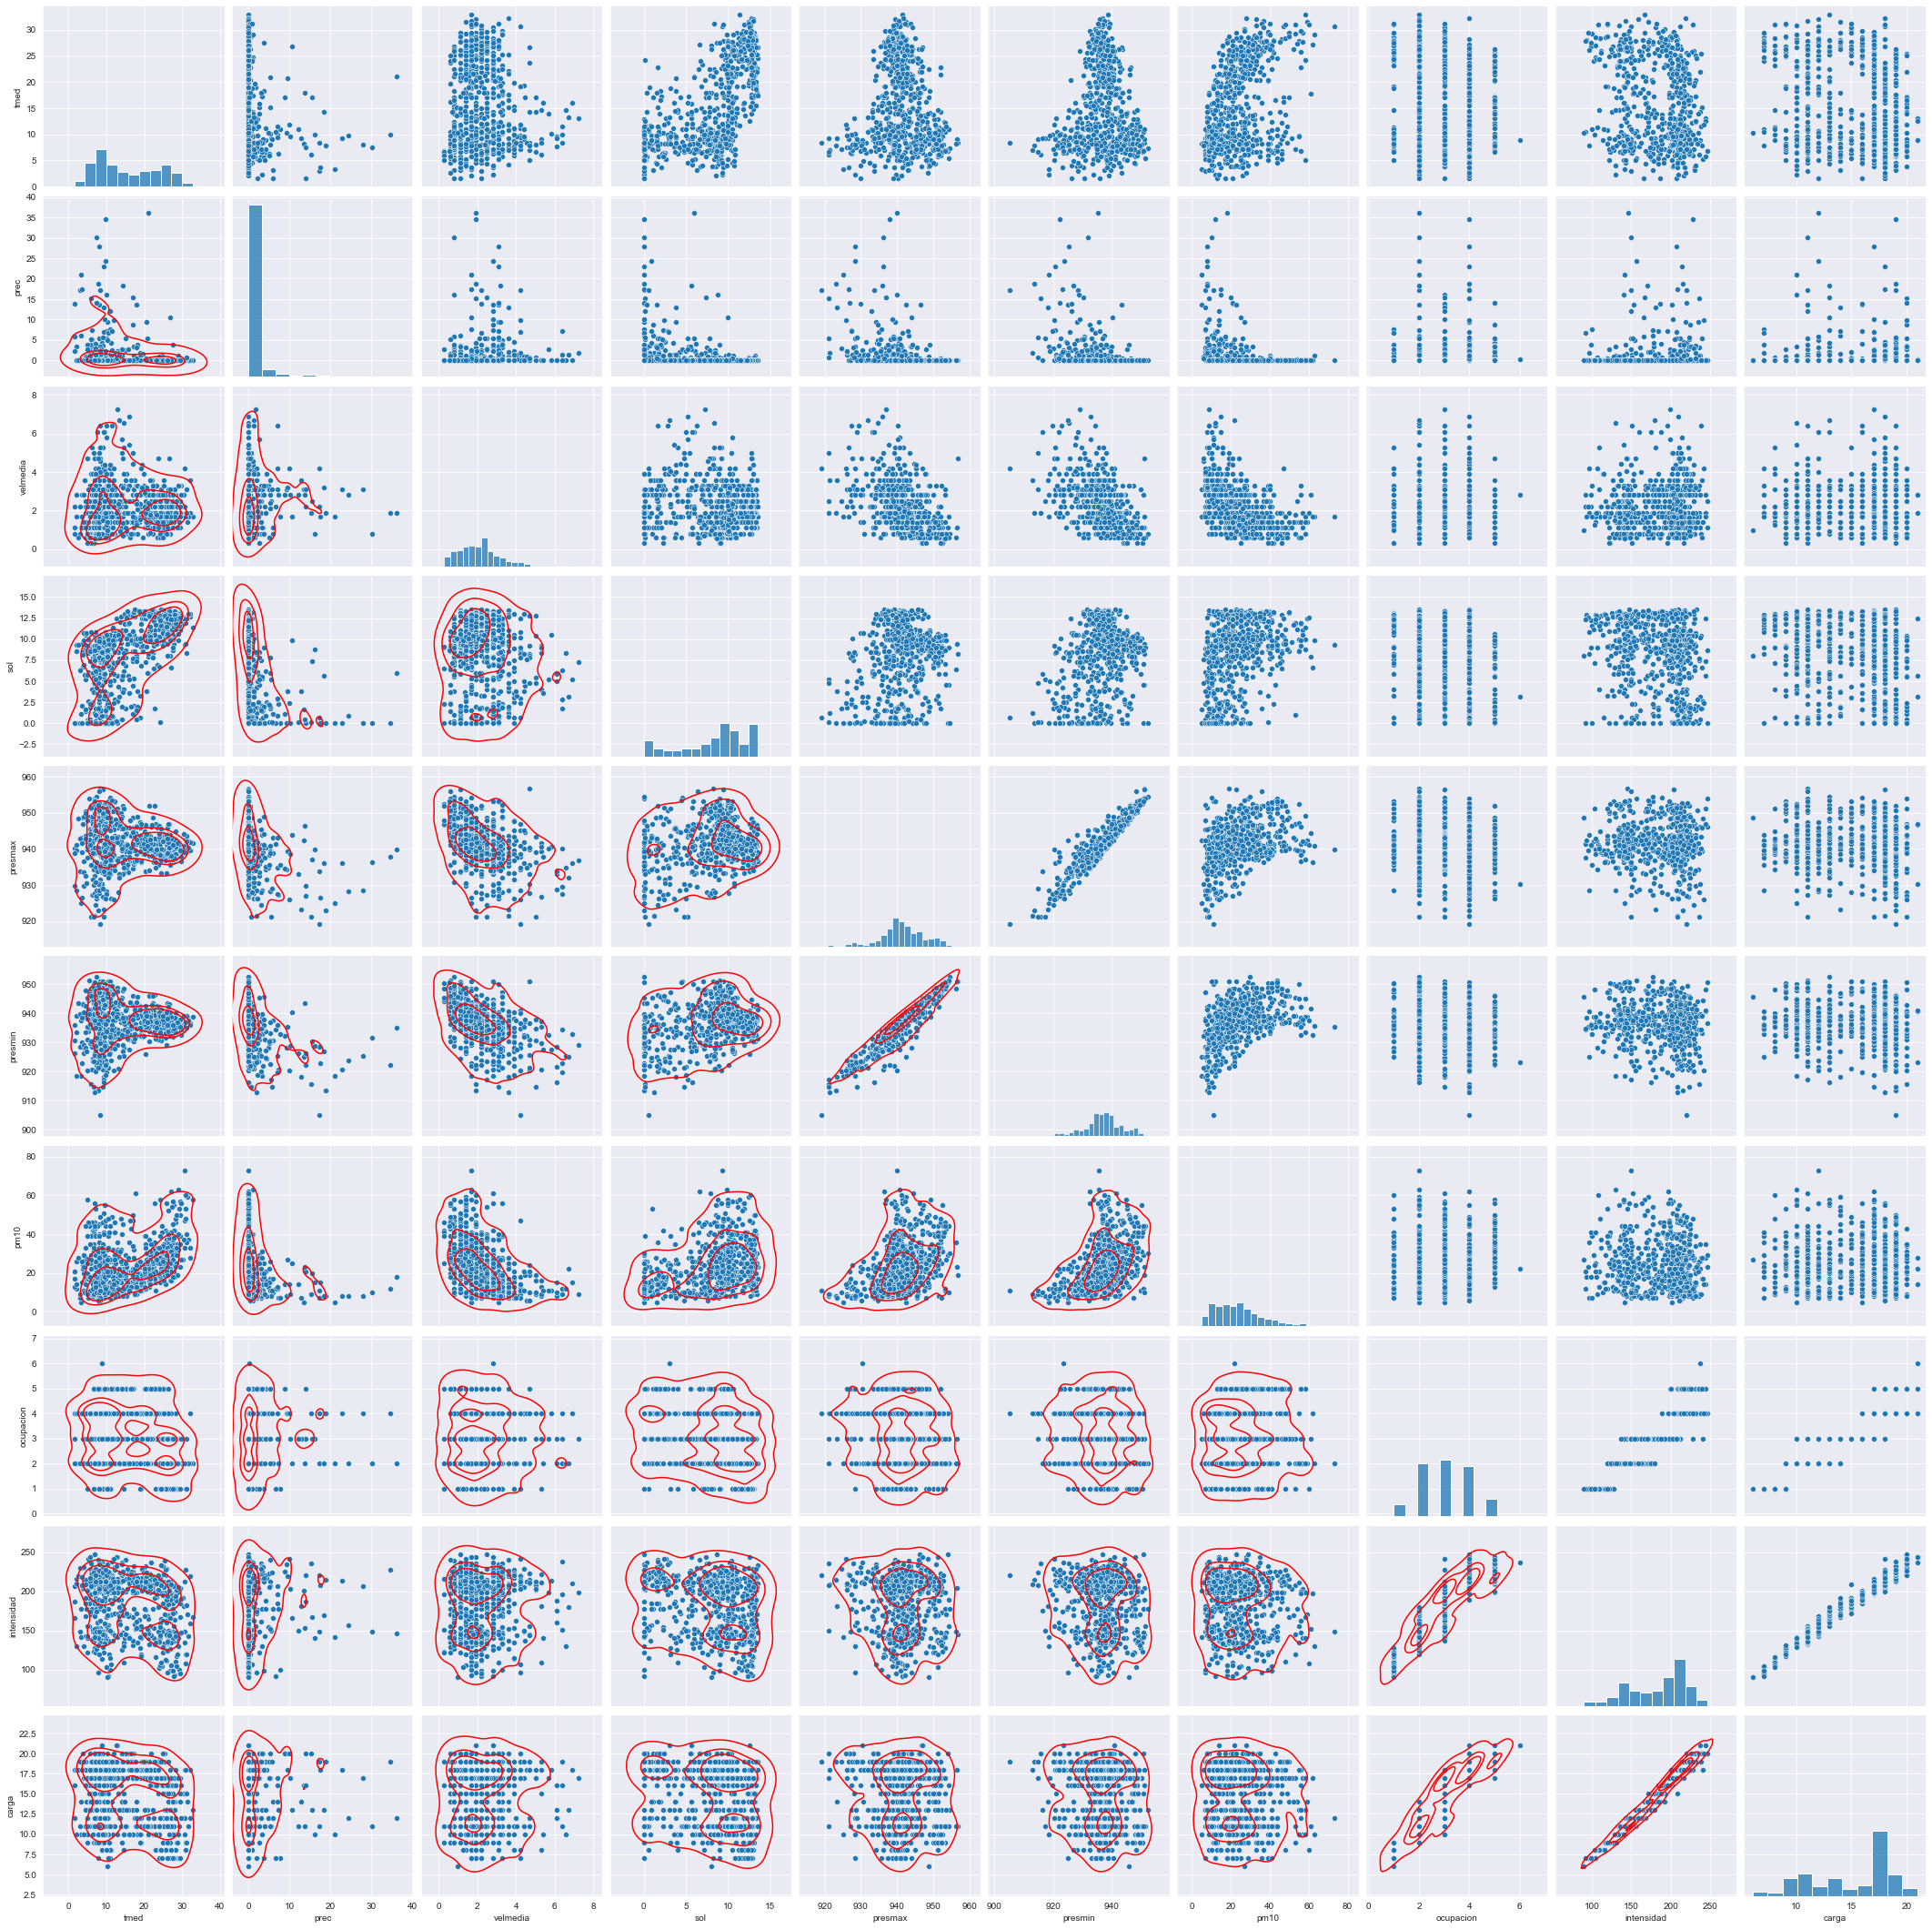

In [18]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10
from seaborn import pairplot
df_mad_subframe=df_mad[['tmed','prec','velmedia','sol','presmax','presmin','pm10','season_name','ocupacion','intensidad','carga']]
g = sns.pairplot(df_mad_subframe, diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

ValueError: Format 'jpeg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

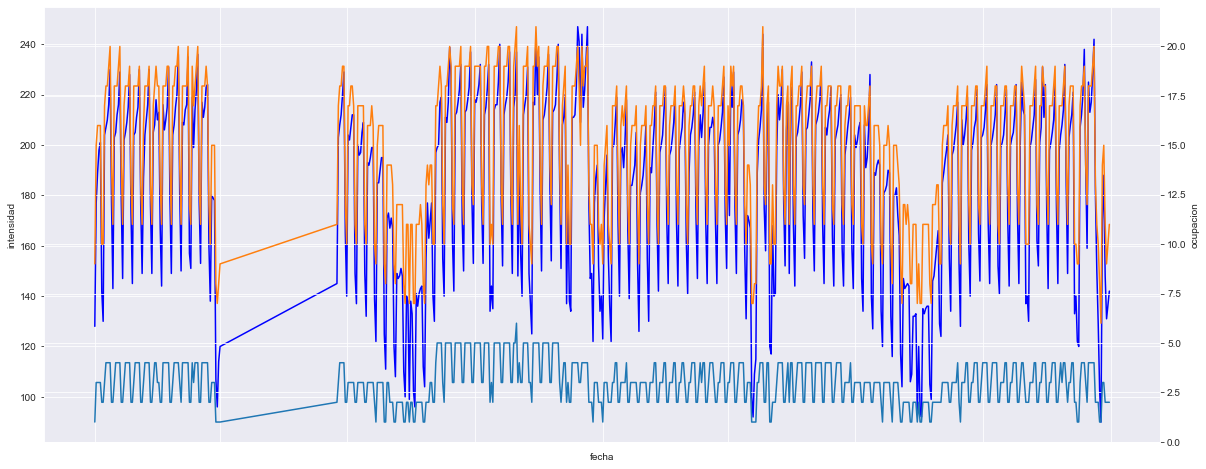

In [19]:
#vemos el trafico por fecha

ax=sns.lineplot(data=df_mad.intensidad, color="b")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.ocupacion,palette='g', ax=ax2)
sns.lineplot(data=df_mad.carga,palette='y', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('trafico.jpg', format='jpeg', dpi=70)

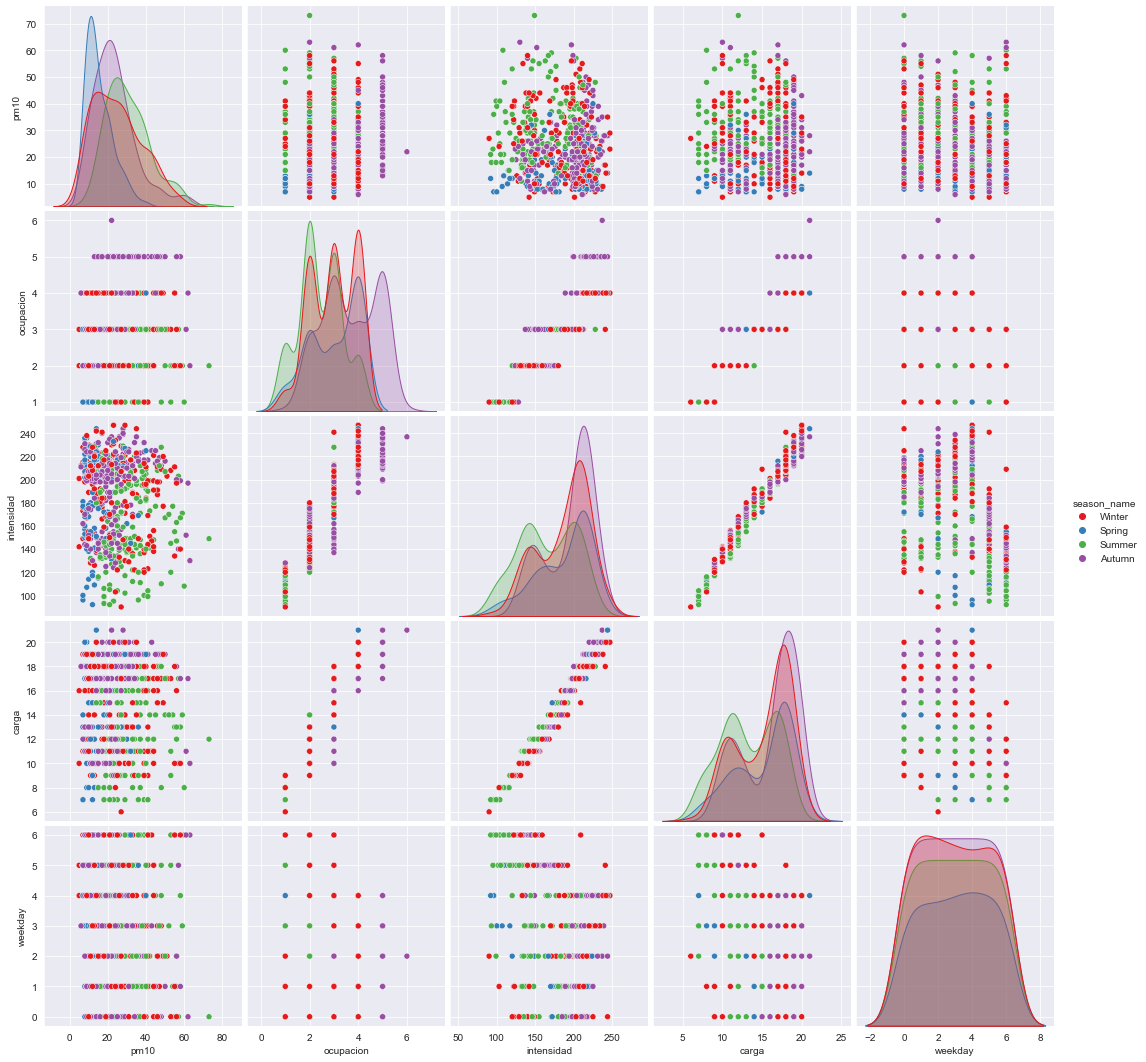

In [20]:
##visualizaremos vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','ocupacion','intensidad','carga','weekday','season_name']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

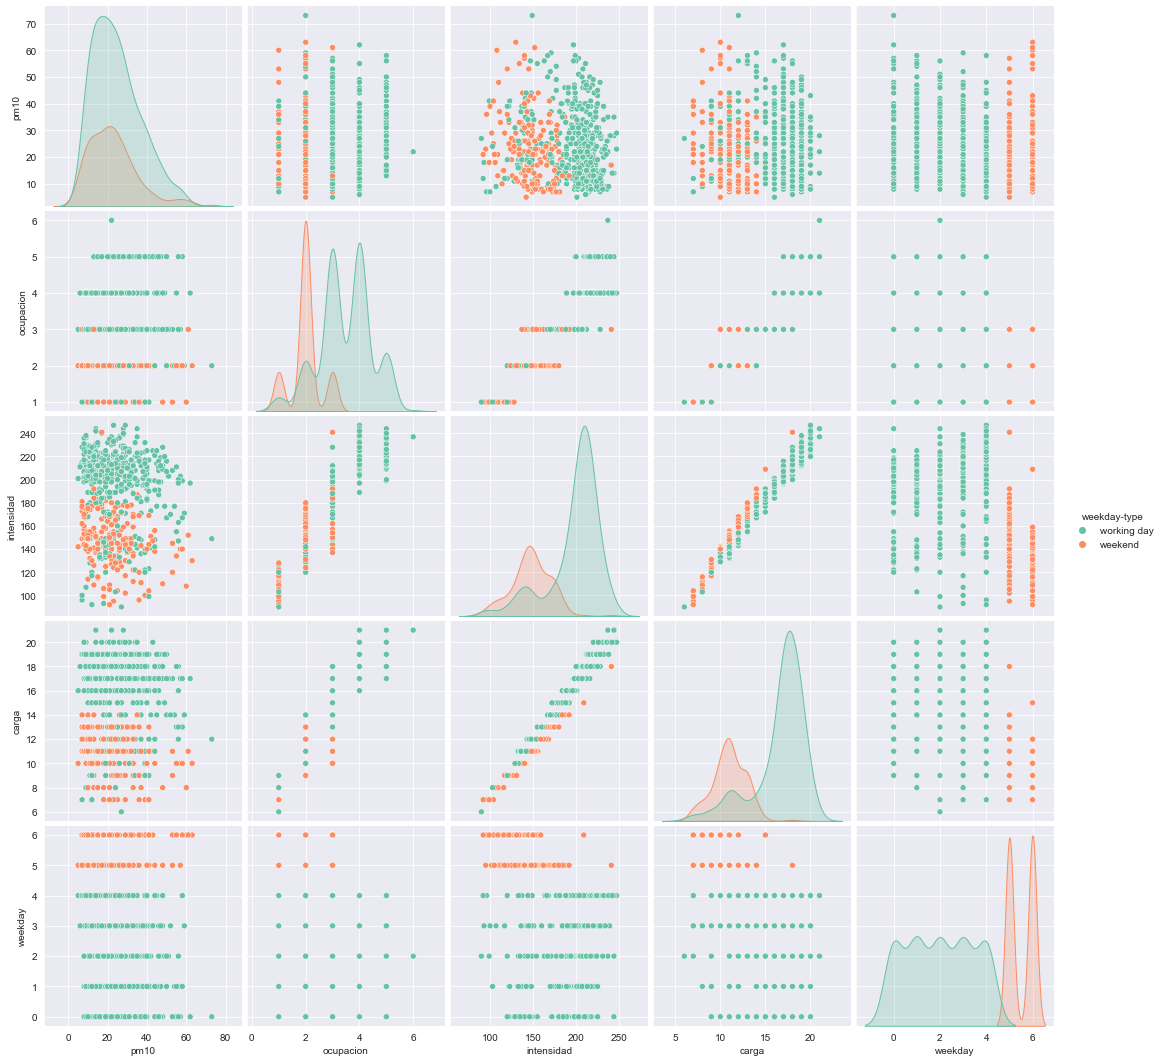

In [21]:
##visualizaremos vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['pm10','ocupacion','intensidad','carga','weekday','weekday-type','season_name']]
sns.pairplot(df_mad_subframe,hue='weekday-type',palette='Set2',height=3)

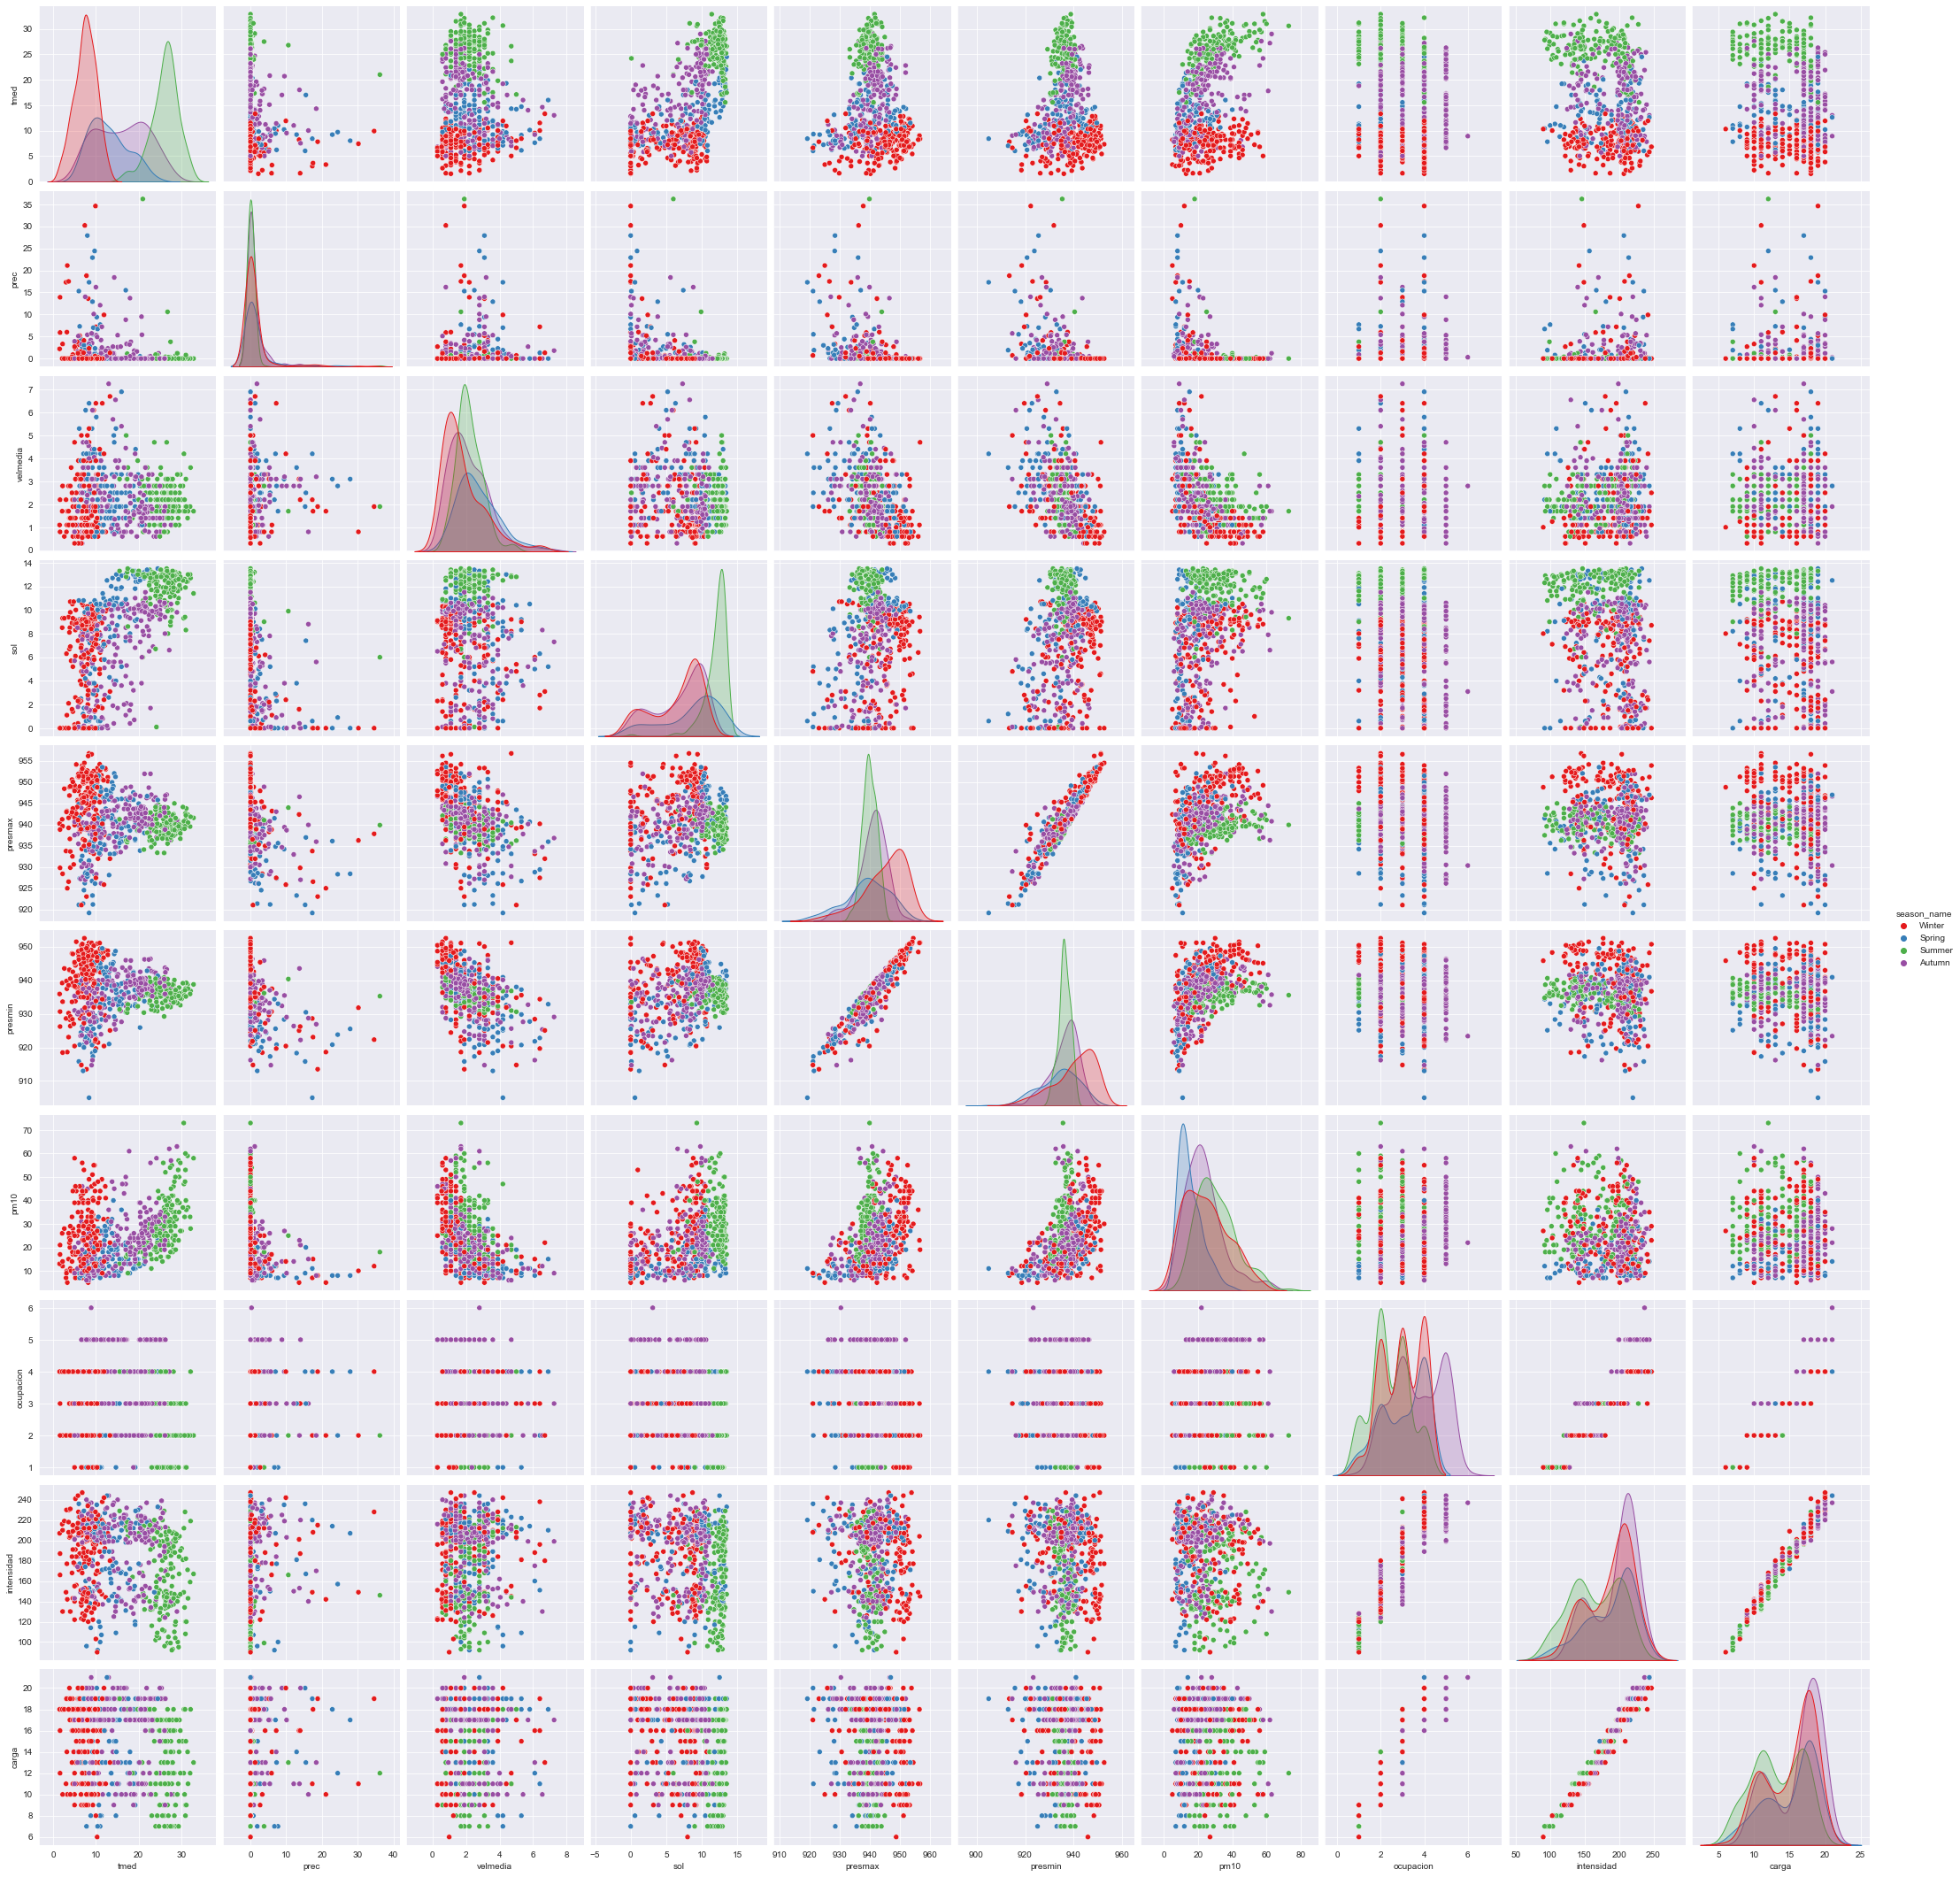

In [22]:
##visualizaremos graficos para datos de temperatura,viento,precipitacion,insolacion, presion pm10 vs estaciones del año
sns.set_style("darkgrid")
df_mad_subframe=df_mad[['tmed','prec','velmedia','sol','presmax','presmin','pm10','season_name','ocupacion','intensidad','carga']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

ValueError: Format 'jpeg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

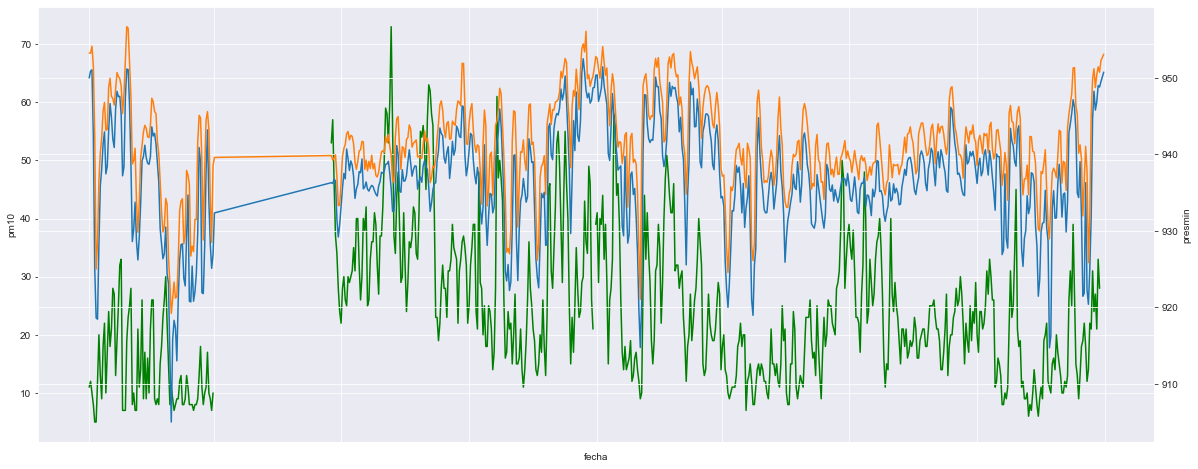

In [23]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_presiones.jpg', format='jpeg', dpi=70)

ValueError: Format 'jpeg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

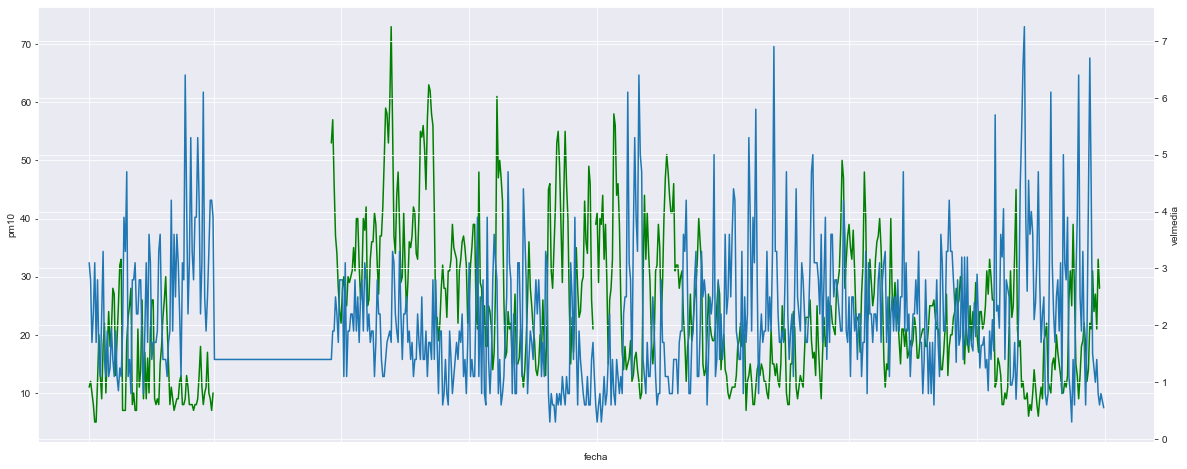

In [24]:
ax=sns.lineplot(data=df_mad.pm10, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.velmedia,palette='Set2', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('pm10_vs_viento.jpg', format='jpeg', dpi=70)

ValueError: Format 'jpeg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

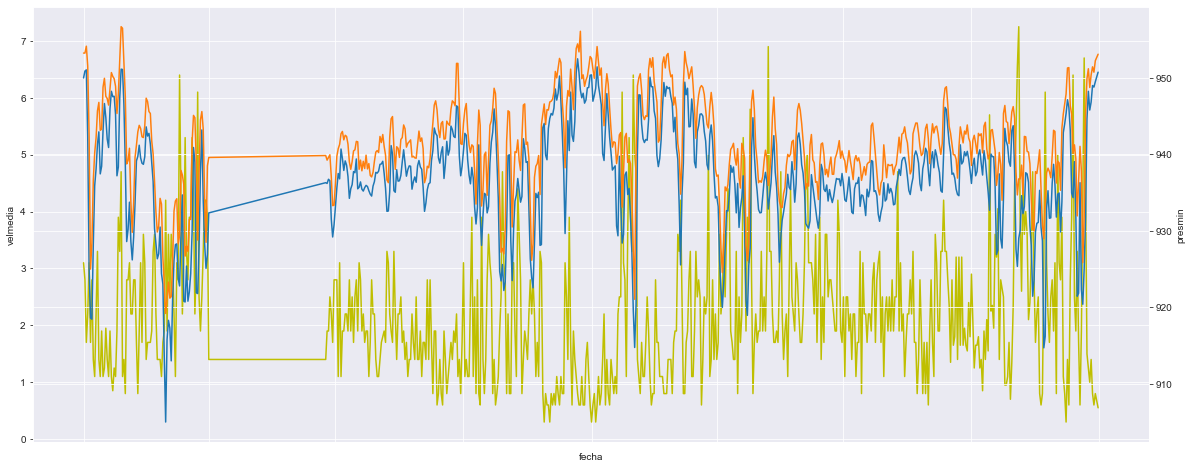

In [25]:
ax=sns.lineplot(data=df_mad.velmedia, color="y")
ax2 = plt.twinx()
sns.lineplot(data=df_mad.presmin,palette='Set1', ax=ax2)
sns.lineplot(data=df_mad.presmax,palette='Set1', ax=ax2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.savefig('presion_vs_viento.jpg', format='jpeg', dpi=70)

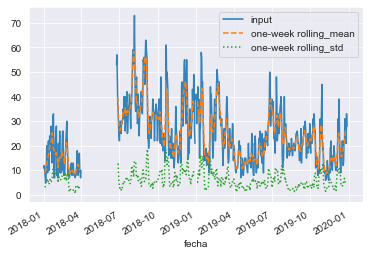

In [26]:
#ver como graficar medias moviles para presion y pm10?

rolling = df_mad['pm10'].rolling(7, center=True)

data = pd.DataFrame({'input': df_mad['pm10'],
                     'one-week rolling_mean': rolling.mean(),
                     'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.9)

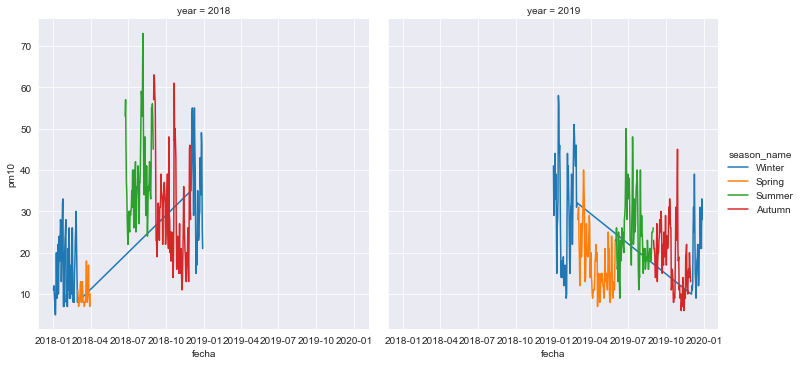

In [27]:
sns.relplot(
    data=df_mad, x="fecha", y="pm10",
    col="year", hue="season_name",
    kind="line"
)